In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from glob import glob
import os
import re
import pyemma.msm as msm
import pyemma.coordinates as coor
import numpy as np
import my_network_plot as myplt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker
import operator
import pandas as pd
import mdtraj as md
import matplotlib.image as mpimg 
import pickle
from shutil import move

/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/pyemma/util/log.py:64: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)
/Users/robertarbon/miniconda3/envs/science/lib/python3.6/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.6, you have 2.5.5.
  .format(latest=latest, current=current), category=UserWarning)


In [3]:
df = pd.read_csv('bhmm_mods/bhmm_mods_stats.csv')

## Free energy barriers 

$$
k=\kappa {\frac {k_{B}T}{h}}e^{\frac {\Delta S^{\ddagger }}{R}}e^{\frac {-\Delta H^{\ddagger }}{RT}}
$$

In [4]:
from scipy.constants import k, h, R, calorie

T = 300
ps_to_sec = 10**12

def ts_to_dg(ts):
    return -R*T*np.log(h/(ts*k*T))/1000/calorie

In [7]:
df.head()

,traj_idx,time_idx,timescales,n_states,n_timescales
0,7,157,151.146827,2,2
1,7,157,158.947585,2,2
2,7,813,24.002617,2,2
3,7,813,78.265591,2,2
4,1,519,46.517560,2,2


In [8]:
df['timescales_sec'] = df['timescales']/ps_to_sec
df['dg'] = df['timescales_sec'].apply(ts_to_dg)

In [9]:
df.head()

,traj_idx,time_idx,timescales,n_states,n_timescales,timescales_sec,dg
0,7,157,151.146827,2,2,1.511468e-10,4.084294
1,7,157,158.947585,2,2,1.589476e-10,4.114294
2,7,813,24.002617,2,2,2.400262e-11,2.987305
3,7,813,78.265591,2,2,7.826559e-11,3.691934
4,1,519,46.517560,2,2,4.651756e-11,3.381765


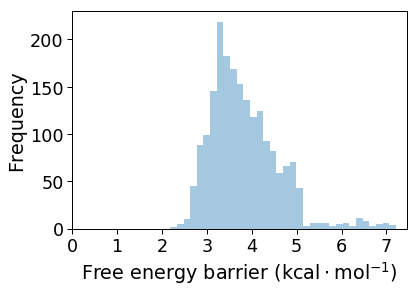

In [11]:
with sns.plotting_context('paper', font_scale=2):
    ax = sns.distplot(df['dg'], hist=True, kde=False, norm_hist=False)
    _, ub = ax.get_xlim()
    ax.set_xlim(0, ub)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Free energy barrier ($\mathrm{kcal}\cdot\mathrm{mol^{-1}}$)')
    plt.savefig('free_energy_barrier_hist.png', dpi=600, bbox_inches='tight')

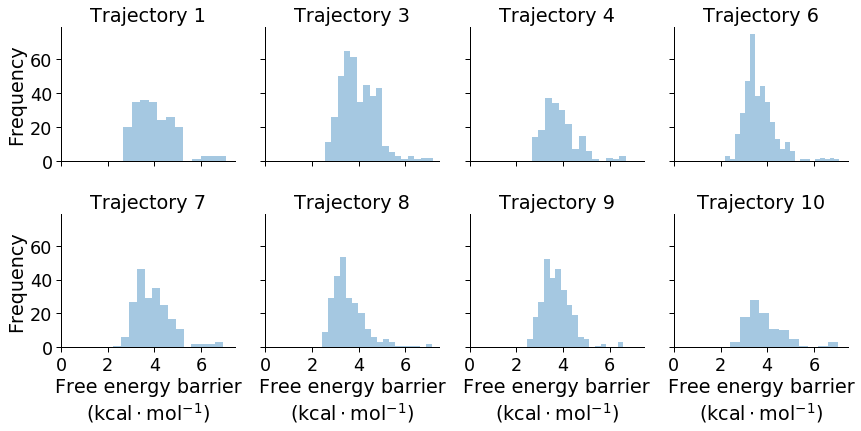

In [13]:
with sns.plotting_context('paper', font_scale=2):
    g = sns.FacetGrid(data=df, col='traj_idx', col_wrap=4)
    g.map(sns.distplot, 'dg', hist=True, kde=False, norm_hist=False)
    g.set_titles("Trajectory {col_name}")
    for ax in g.axes.flatten():
        _, ub = ax.get_xlim()
        ax.set_xlim(0, ub)
    _ = [g.axes[i].set_ylabel('Frequency') for i in [0, 4]]
    _ = [g.axes[i].set_xlabel('Free energy barrier\n($\mathrm{kcal}\cdot\mathrm{mol^{-1}}$)') for i in range(4,8)]
    plt.savefig('free_energy_barrier_hist_by_traj.png', dpi=600, bbox_inches='tight')

In [ ]:
# df = pd.read_csv('all_timescales.csv')
